In [5]:
from pandas import read_csv
dataframe=read_csv('horse-colic.csv', header=None, na_values='?')
print(dataframe.head())
for i in range(dataframe.shape[1]):
    n_miss=dataframe[[i]].isnull().sum()
    perc=n_miss/dataframe.shape[0]*100
    print('>%d , Missing %d : (%.1f%%)' %(i,n_miss,perc))   

    0   1        2     3      4     5    6    7    8    9   ...    18    19  \
0  2.0   1   530101  38.5   66.0  28.0  3.0  3.0  NaN  2.0  ...  45.0   8.4   
1  1.0   1   534817  39.2   88.0  20.0  NaN  NaN  4.0  1.0  ...  50.0  85.0   
2  2.0   1   530334  38.3   40.0  24.0  1.0  1.0  3.0  1.0  ...  33.0   6.7   
3  1.0   9  5290409  39.1  164.0  84.0  4.0  1.0  6.0  2.0  ...  48.0   7.2   
4  2.0   1   530255  37.3  104.0  35.0  NaN  NaN  6.0  2.0  ...  74.0   7.4   

    20   21   22  23     24  25  26  27  
0  NaN  NaN  2.0   2  11300   0   0   2  
1  2.0  2.0  3.0   2   2208   0   0   2  
2  NaN  NaN  1.0   2      0   0   0   1  
3  3.0  5.3  2.0   1   2208   0   0   1  
4  NaN  NaN  2.0   2   4300   0   0   2  

[5 rows x 28 columns]
>0 , Missing 1 : (0.3%)
>1 , Missing 0 : (0.0%)
>2 , Missing 0 : (0.0%)
>3 , Missing 60 : (20.0%)
>4 , Missing 24 : (8.0%)
>5 , Missing 58 : (19.3%)
>6 , Missing 56 : (18.7%)
>7 , Missing 69 : (23.0%)
>8 , Missing 47 : (15.7%)
>9 , Missing 32 : (10.7

C:\Users\lenovo\AppData\Local\Temp\ipykernel_3132\1222235227.py:7: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print('>%d , Missing %d : (%.1f%%)' %(i,n_miss,perc))
C:\Users\lenovo\AppData\Local\Temp\ipykernel_3132\1222235227.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('>%d , Missing %d : (%.1f%%)' %(i,n_miss,perc))
C:\Users\lenovo\AppData\Local\Temp\ipykernel_3132\1222235227.py:7: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print('>%d , Missing %d : (%.1f%%)' %(i,n_miss,perc))
C:\Users\lenovo\AppData\Local\Temp\ipykernel_3132\1222235227.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead


In [6]:
from numpy import isnan
from sklearn.impute import SimpleImputer
from pandas import read_csv
dataframe=read_csv('horse-colic.csv', header=None, na_values='?')
data=dataframe.values
print(dataframe.head())
ix = [i for i in range(data.shape[1]) if i != 23]
X,y=   data[:,ix] ,data[:,23]
print('Missing %d' %sum(isnan(X).flatten()))
imputer=SimpleImputer(strategy='mean')
imputer.fit(X)
Xtrans=imputer.transform(X)
print('Missing: %d' % sum(isnan(Xtrans).flatten()))

    0   1        2     3      4     5    6    7    8    9   ...    18    19  \
0  2.0   1   530101  38.5   66.0  28.0  3.0  3.0  NaN  2.0  ...  45.0   8.4   
1  1.0   1   534817  39.2   88.0  20.0  NaN  NaN  4.0  1.0  ...  50.0  85.0   
2  2.0   1   530334  38.3   40.0  24.0  1.0  1.0  3.0  1.0  ...  33.0   6.7   
3  1.0   9  5290409  39.1  164.0  84.0  4.0  1.0  6.0  2.0  ...  48.0   7.2   
4  2.0   1   530255  37.3  104.0  35.0  NaN  NaN  6.0  2.0  ...  74.0   7.4   

    20   21   22  23     24  25  26  27  
0  NaN  NaN  2.0   2  11300   0   0   2  
1  2.0  2.0  3.0   2   2208   0   0   2  
2  NaN  NaN  1.0   2      0   0   0   1  
3  3.0  5.3  2.0   1   2208   0   0   1  
4  NaN  NaN  2.0   2   4300   0   0   2  

[5 rows x 28 columns]
Missing 1605
Missing: 0


In [10]:
from sklearn.pipeline import Pipeline

In [13]:
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

dataframe=read_csv('horse-colic.csv', header=None, na_values='?')
data=dataframe.values
print(dataframe.head())
ix = [i for i in range(data.shape[1]) if i != 23]
X,y=   data[:,ix] ,data[:,23]
print('Missing %d' %sum(isnan(X).flatten()))
imputer=SimpleImputer(strategy='mean')
model=RandomForestClassifier()
pipeline=Pipeline(steps=[('i',imputer),('m',model)])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy :%.3f (%.3f)' %(mean(scores),std(scores)))

    0   1        2     3      4     5    6    7    8    9   ...    18    19  \
0  2.0   1   530101  38.5   66.0  28.0  3.0  3.0  NaN  2.0  ...  45.0   8.4   
1  1.0   1   534817  39.2   88.0  20.0  NaN  NaN  4.0  1.0  ...  50.0  85.0   
2  2.0   1   530334  38.3   40.0  24.0  1.0  1.0  3.0  1.0  ...  33.0   6.7   
3  1.0   9  5290409  39.1  164.0  84.0  4.0  1.0  6.0  2.0  ...  48.0   7.2   
4  2.0   1   530255  37.3  104.0  35.0  NaN  NaN  6.0  2.0  ...  74.0   7.4   

    20   21   22  23     24  25  26  27  
0  NaN  NaN  2.0   2  11300   0   0   2  
1  2.0  2.0  3.0   2   2208   0   0   2  
2  NaN  NaN  1.0   2      0   0   0   1  
3  3.0  5.3  2.0   1   2208   0   0   1  
4  NaN  NaN  2.0   2   4300   0   0   2  

[5 rows x 28 columns]
Missing 1605
Mean Accuracy :0.861 (0.055)


c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


>mean 0.861 (0.052)
>median 0.870 (0.056)
>most_frequent 0.862 (0.054)
>constant 0.883 (0.048)


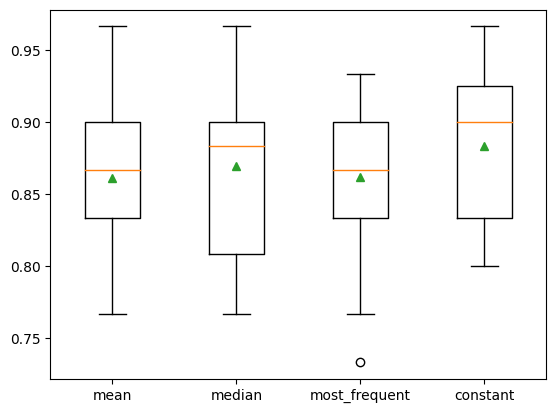

In [17]:
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# load dataset
dataframe = read_csv('horse-colic.csv', header=None, na_values='?')
# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]
# evaluate each strategy on the dataset
results = list()
strategies = ['mean', 'median', 'most_frequent', 'constant']
for s in strategies:
# create the modeling pipeline
    pipeline = Pipeline(steps=[('i', SimpleImputer(strategy=s)), ('m',
    RandomForestClassifier())])
# evaluate the model
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# store results
    results.append(scores)
    print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.show()

In [27]:
from numpy import nan
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
data_frame=read_csv('horse-colic.csv',header=None,na_values='?')
data=data_frame.values
ix = [i for i in range(data.shape[1]) if i != 23]
X,y= data[:,ix],data[:,23]
pipeline = Pipeline(steps=[('i', SimpleImputer(strategy='constant')), ('m',RandomForestClassifier())])
pipeline.fit(X,y)
row = [2, 1, 530101, 38.50, 66, 28, 3, 3, nan, 2, 5, 4, 4, nan, nan, nan, 3, 5, 45.00,
8.40, nan, nan, 2, 11300, 00000, 00000, 2]
yhat=pipeline.predict([row])
print('Predicted Class: %d' % yhat[0])

Predicted Class: 2
